# **Import Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/Othercomputers/My Laptop/Kuliah/SEMESTER 5/Deep Learning/Praktikum Pertemuan 6')

# **Library Import**

In [3]:
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve, auc
)

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# **Data Preparation**

In [4]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        if os.path.isdir(path):
            for img_filename in os.listdir(path):
                img_path = os.path.join(path, img_filename)
                try:
                    img = Image.open(img_path)
                    img = img.convert('RGB')
                    images.append(np.array(img))
                    labels.append(filename)
                except Exception as e:
                    print(f"Error loading image: {img_path}, {e}")
    return images, labels


dataset_path = "/content/drive/Othercomputers/My Laptop/Kuliah/SEMESTER 5/Deep Learning/Praktikum Pertemuan 6/Datasets"

images, labels = load_images_from_folder(dataset_path)

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [5]:
# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    np.array(images), labels_encoded, test_size=0.2, random_state=42
)


def plot_label_distribution(labels, title):
  label_counts = pd.Series(labels).value_counts()
  plt.figure(figsize=(10, 5))
  sns.barplot(x=label_counts.index, y=label_counts.values)
  plt.title(title)
  plt.xlabel('Labels')
  plt.ylabel('Count')
  plt.show()

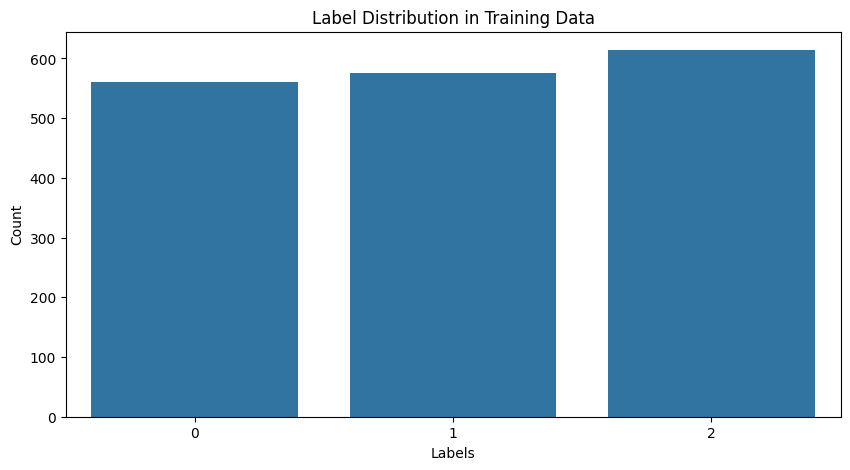

In [6]:
plot_label_distribution(train_labels, 'Label Distribution in Training Data')

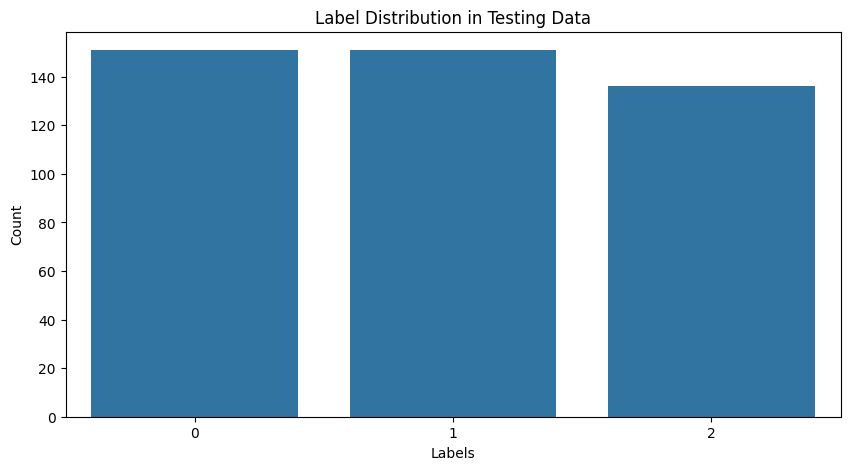

In [7]:
plot_label_distribution(test_labels, 'Label Distribution in Testing Data')

In [8]:
def show_random_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 4))
    indices = np.random.choice(np.arange(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

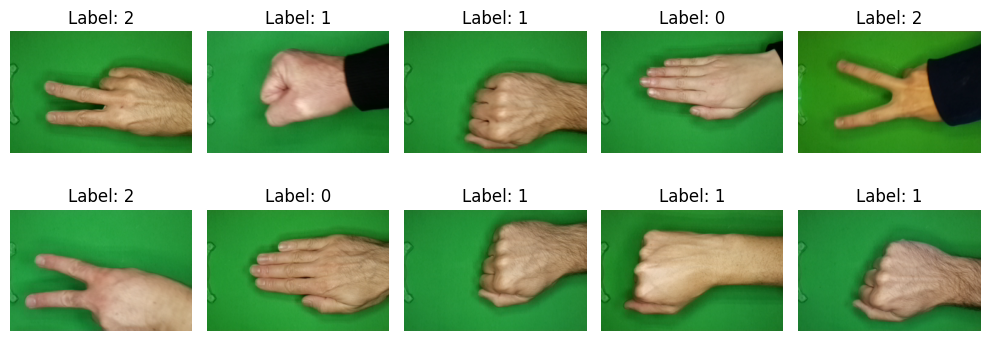

In [9]:
show_random_images(train_images, train_labels)

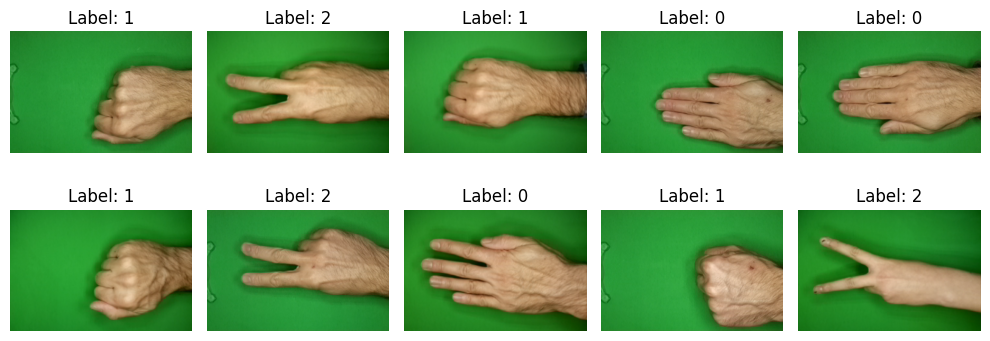

In [10]:
show_random_images(test_images, test_labels)

Matrix Representation of Digit 2:
[[[ 35 116  39]
  [ 37 117  40]
  [ 34 115  38]
  ...
  [ 40 122  37]
  [ 39 120  36]
  [ 36 120  35]]

 [[ 34 117  37]
  [ 34 117  37]
  [ 33 116  36]
  ...
  [ 36 122  34]
  [ 36 122  34]
  [ 35 119  34]]

 [[ 35 118  38]
  [ 35 118  38]
  [ 36 119  39]
  ...
  [ 36 122  34]
  [ 37 124  35]
  [ 37 121  36]]

 ...

 [[ 31 124  38]
  [ 30 123  37]
  [ 30 123  37]
  ...
  [ 34 123  34]
  [ 34 123  34]
  [ 36 120  33]]

 [[ 30 123  37]
  [ 30 123  37]
  [ 32 125  39]
  ...
  [ 34 123  34]
  [ 34 123  34]
  [ 36 120  33]]

 [[ 31 122  37]
  [ 30 123  37]
  [ 30 123  37]
  ...
  [ 33 122  31]
  [ 34 124  32]
  [ 36 120  33]]]


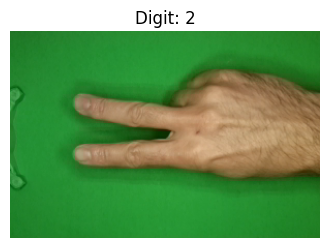

In [11]:
def show_matrix_representation(image, label):
    print(f'Matrix Representation of Digit {label}:')
    print(image)

    # Visualize the matrix representation
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f'Digit: {label}')
    plt.axis('off')
    plt.show()

# Display the matrix representation of a single image
random_idx = np.random.randint(0, len(train_images))
show_matrix_representation(train_images[random_idx], train_labels[random_idx])

# **Data Preprocessing**

In [12]:
# Preprocessing: Normalisasi dan resize
train_images_resized = tf.image.resize(train_images, (227, 227)).numpy().astype('float32') / 255
test_images_resized = tf.image.resize(test_images, (227, 227)).numpy().astype('float32') / 255

# Resize for VGG16
train_images_vgg = tf.image.resize(train_images, (224, 224)).numpy().astype('float32') / 255
test_images_vgg = tf.image.resize(test_images, (224, 224)).numpy().astype('float32') / 255

# One-hot encode labels dengan num_classes yang sesuai
train_labels_cat = to_categorical(train_labels, num_classes=3)
test_labels_cat = to_categorical(test_labels, num_classes=3)

# **Data Training**

## **Alexnet Model**



In [13]:
from tensorflow.keras import layers, models
from models.base_model import BaseModel

class AlexNet(BaseModel):
  def build_model(self):
    model = models.Sequential()

    # 1st Conv Layer
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=self.input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    # 2nd Conv layer
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    # 3rd Conv layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # 4th Conv layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # 5th Conv layer
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(self.num_classes, activation='softmax'))

    return model

  def train_model(self, train_data, train_labels, validation_data=None, epochs=10, batch_size=32):
      # Implementasi metode pelatihan
      self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      self.model.fit(train_data, train_labels, validation_data=validation_data, epochs=epochs, batch_size=batch_size)

  def evaluate_model(self, test_data):
      # Implementasi metode evaluasi
      return self.model.evaluate(test_data)

In [14]:
from tensorflow.keras.optimizers import Adam

# Membuat instance dari model
alexnet = AlexNet(input_shape=(227, 227, 3), num_classes=3)  # Sesuaikan input_shape dan num_classes

# Membuat model dengan memanggil build_model()
model = alexnet.build_model()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,295,043 (222.38 MB)

 Trainable params: 58,294,339 (222.38 MB)

 Non-trainable params: 704 (2.75 KB)

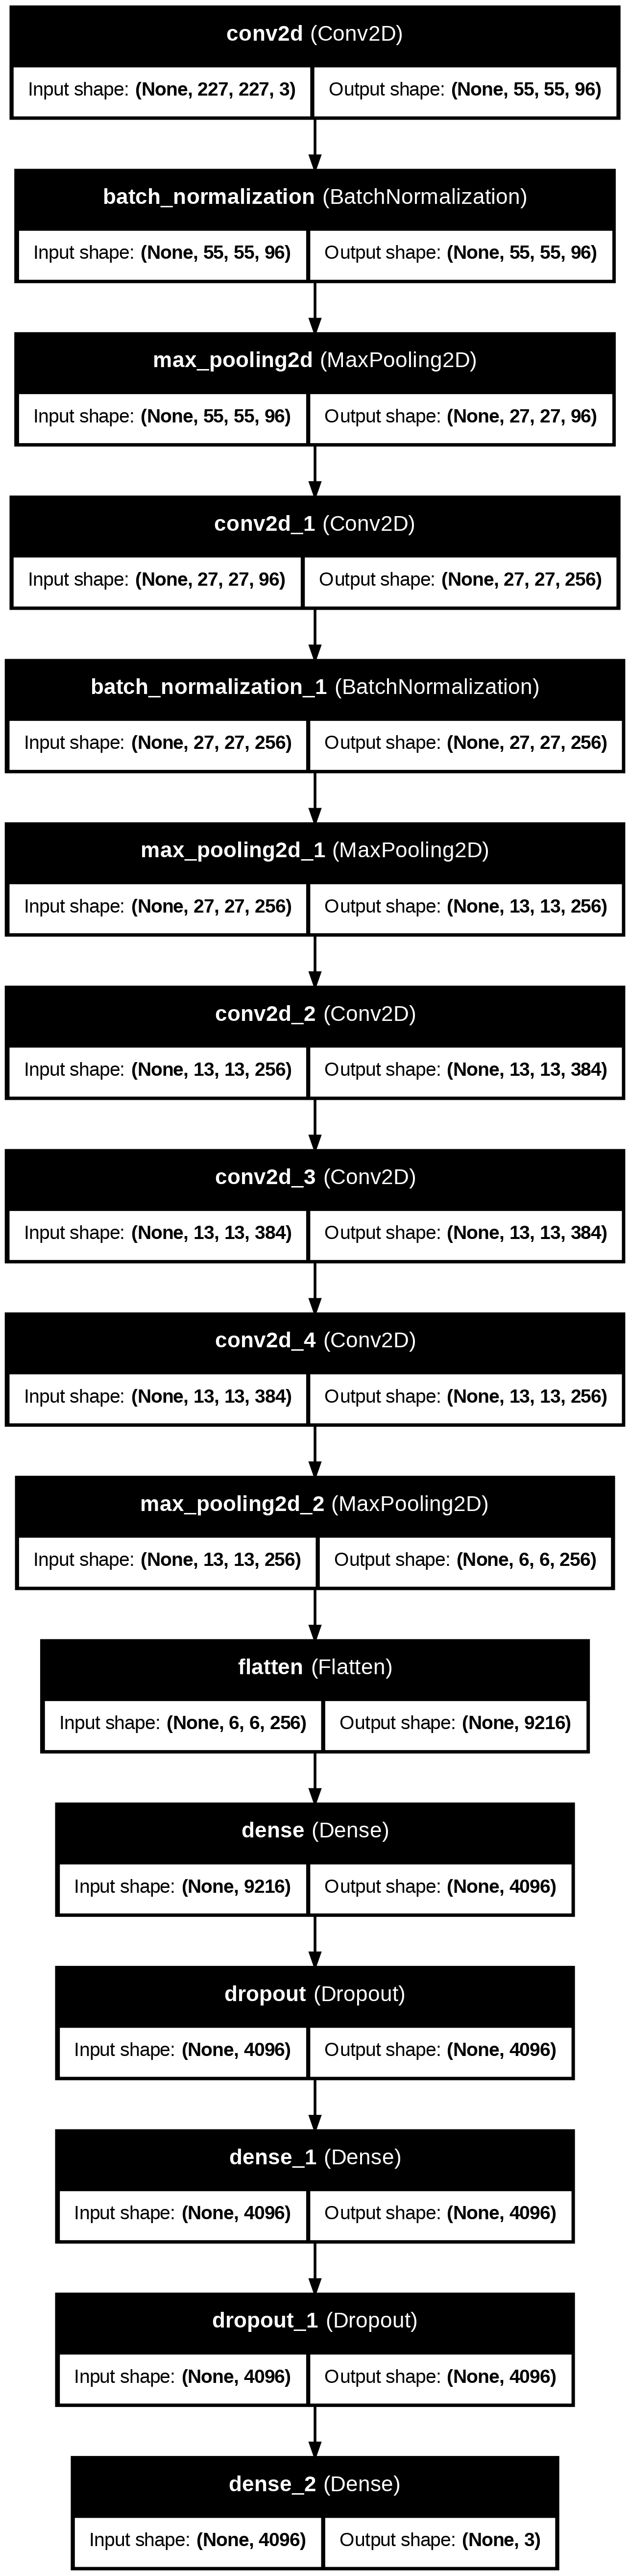

In [15]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [16]:
history = model.fit(train_images_resized, train_labels_cat,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32
                    )

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 323ms/step - accuracy: 0.3759 - loss: 8.8715 - val_accuracy: 0.6000 - val_loss: 0.9363
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6111 - loss: 0.8776 - val_accuracy: 0.5943 - val_loss: 0.8931
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.8109 - loss: 0.5465 - val_accuracy: 0.6371 - val_loss: 0.8179
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8506 - loss: 0.3752 - val_accuracy: 0.8200 - val_loss: 0.5197
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8814 - loss: 0.3532 - val_accuracy: 0.8057 - val_loss: 0.5615
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9358 - loss: 0.2200 - val_accuracy: 0.7057 - val_loss: 1.3581
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9378 - loss: 0.2566 - val_accuracy: 0.5600 - val_loss: 1.3064
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8927 - loss: 0.4484 - val_accuracy: 0.9314 

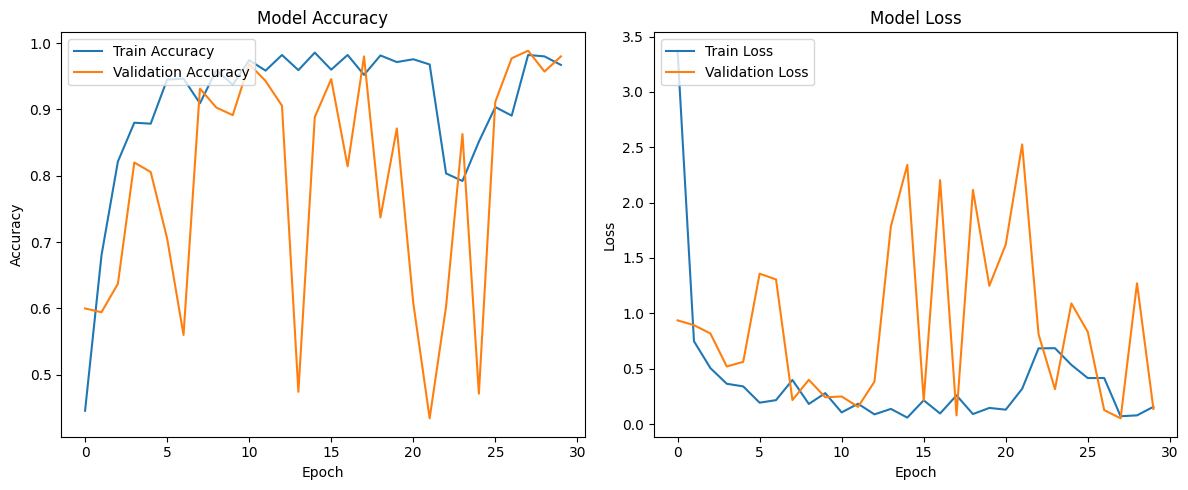

In [17]:
# Plot training & validation accuracy values
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

In [18]:
test_loss, test_acc = model.evaluate(test_images_resized, test_labels_cat)
print(f'Test accuracy: {test_acc:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.9578 - loss: 0.1793
Test accuracy: 0.9635


In [20]:
# Predictions on test data
predictions = model.predict(test_images_resized)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step
Confusion Matrix:
 [[140   8   3]
 [  5 146   0]
 [  0   0 136]]


In [21]:
# Classification Report (Precision, Recall, F1 Score)
class_report = classification_report(test_labels, predicted_classes)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       151
           1       0.95      0.97      0.96       151
           2       0.98      1.00      0.99       136

    accuracy                           0.96       438
   macro avg       0.96      0.96      0.96       438
weighted avg       0.96      0.96      0.96       438



In [22]:
# Misclassification Rate
miss_class_rate = 1 - test_acc
print(f'Misclassification Rate: {miss_class_rate:.4f}')

Misclassification Rate: 0.0365


ROC AUC Score: 0.9934


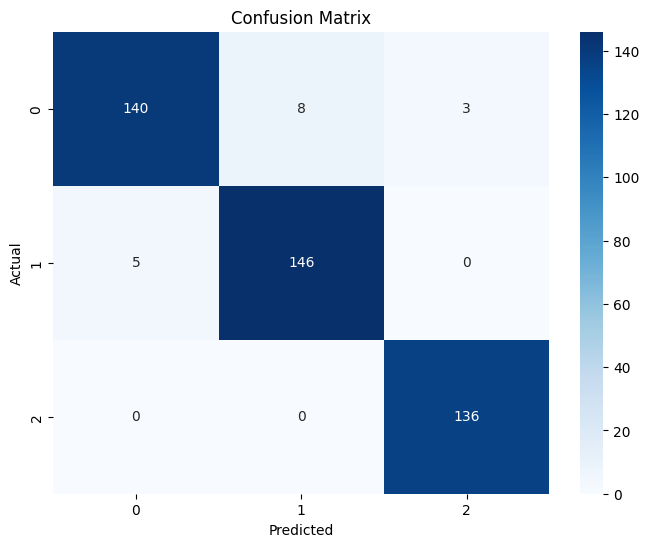

In [23]:
# ROC AUC for each class
auc_roc = roc_auc_score(test_labels_cat, predictions, multi_class="ovr")
print(f'ROC AUC Score: {auc_roc:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

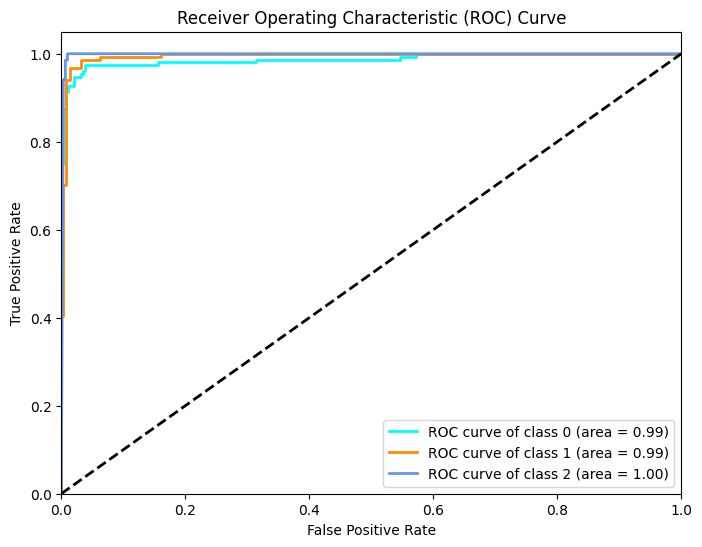

In [25]:
# AUC-ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'pink', 'gray', 'blue']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **VGG16 Model**

In [57]:
from tensorflow.keras import layers, models
from models.base_model import BaseModel

class VGG16(BaseModel):
  def build_model(self):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same', input_shape=self.input_shape))
    model.add(layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(self.num_classes, activation='softmax'))

    return model

  def train_model(self, train_data, train_labels, validation_data=None, epochs=10, batch_size=32):
      # Implementasi metode pelatihan
      self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      self.model.fit(train_data, train_labels, validation_data=validation_data, epochs=epochs, batch_size=batch_size)

  def evaluate_model(self, test_data, test_labels):
      # Evaluasi model dan kembalikan loss dan akurasi
      return self.model.evaluate(test_data, test_labels)

In [58]:
vgg16_model = VGG16(input_shape=(224, 224, 3), num_classes=3)

# Membuat model dengan memanggil build_model()
vgg16_model.model = vgg16_model.build_model()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,295,043 (222.38 MB)

 Trainable params: 58,294,339 (222.38 MB)

 Non-trainable params: 704 (2.75 KB)

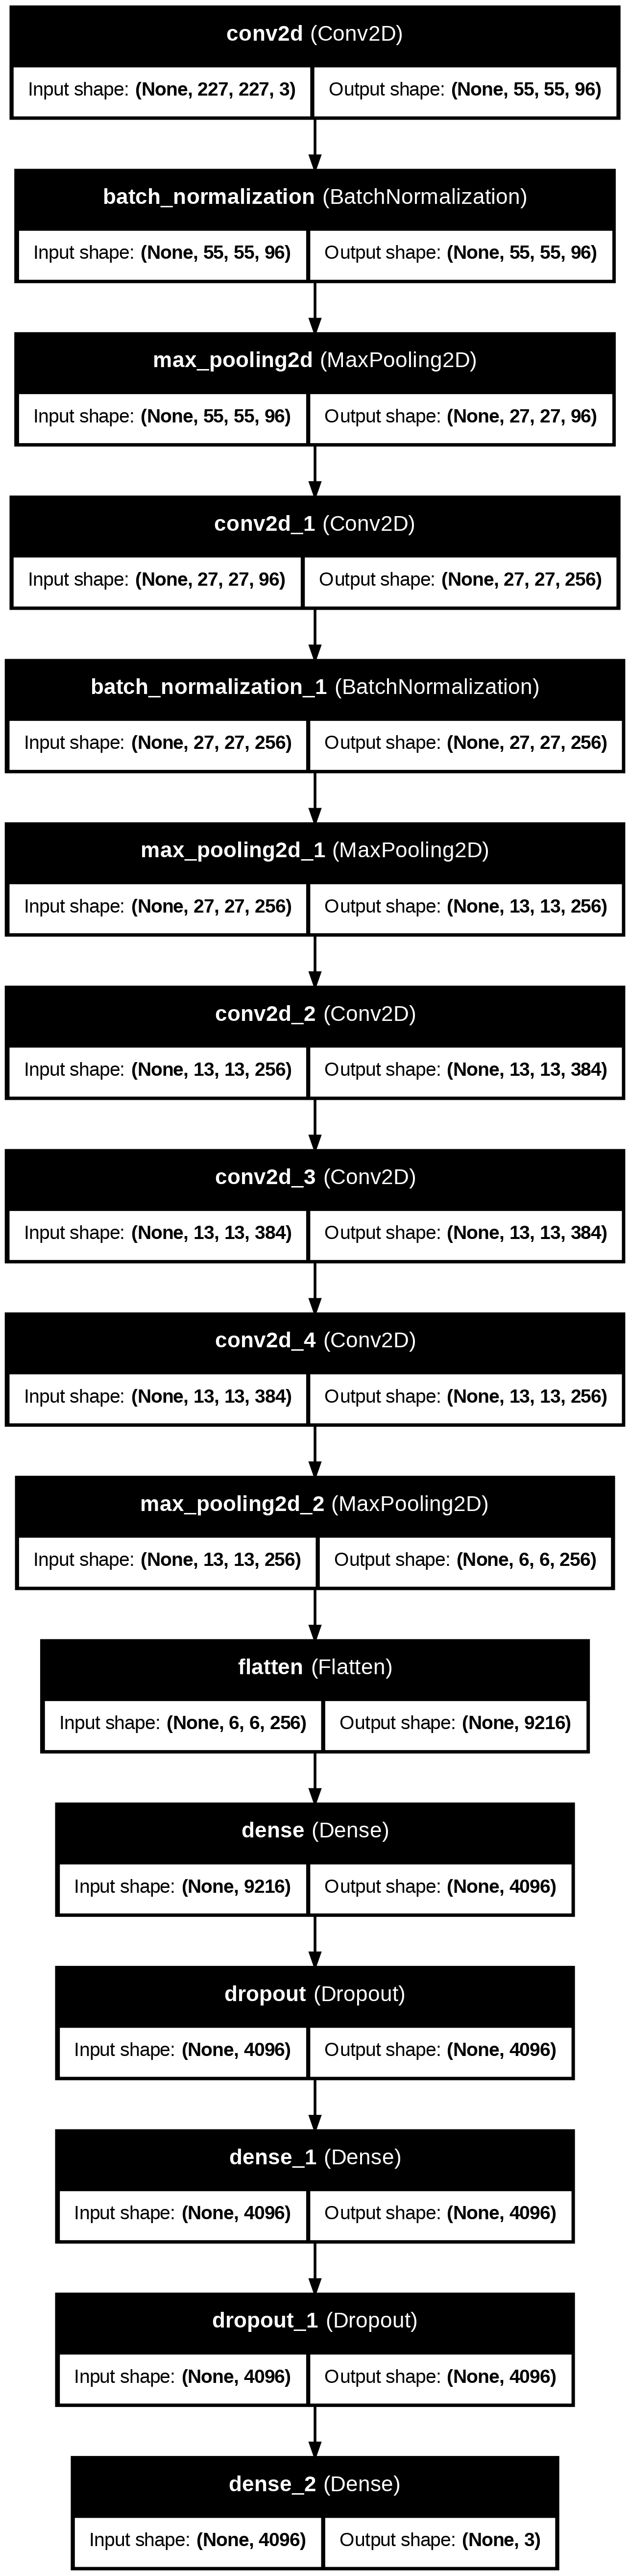

In [59]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [62]:
# Melatih model
vgg16_model.train_model(train_data=train_images_vgg,
                        train_labels=train_labels_cat,
                        validation_data=(test_images_vgg, test_labels_cat),
                        epochs=30,
                        batch_size=32)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 45s 613ms/step - accuracy: 0.3077 - loss: 1.3682 - val_accuracy: 0.3105 - val_loss: 1.1010
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 526ms/step - accuracy: 0.3563 - loss: 1.0969 - val_accuracy: 0.3105 - val_loss: 1.1000
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 509ms/step - accuracy: 0.3315 - loss: 1.0995 - val_accuracy: 0.3105 - val_loss: 1.1037
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 28s 512ms/step - accuracy: 0.3450 - loss: 1.0991 - val_accuracy: 0.3105 - val_loss: 1.1015
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 520ms/step - accuracy: 0.3436 - loss: 1.0983 - val_accuracy: 0.3105 - val_loss: 1.1023
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 512ms/step - accuracy: 0.3487 - loss: 1.0990 - val_accuracy: 0.3105 - val_loss: 1.1011
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 28s 505ms/step - accuracy: 0.3171 - loss: 1.1007 - val_accuracy: 0.3105 - val_loss: 1.1011
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 520ms/step - accuracy: 0.3438 - loss: 1.0994 - val_accu

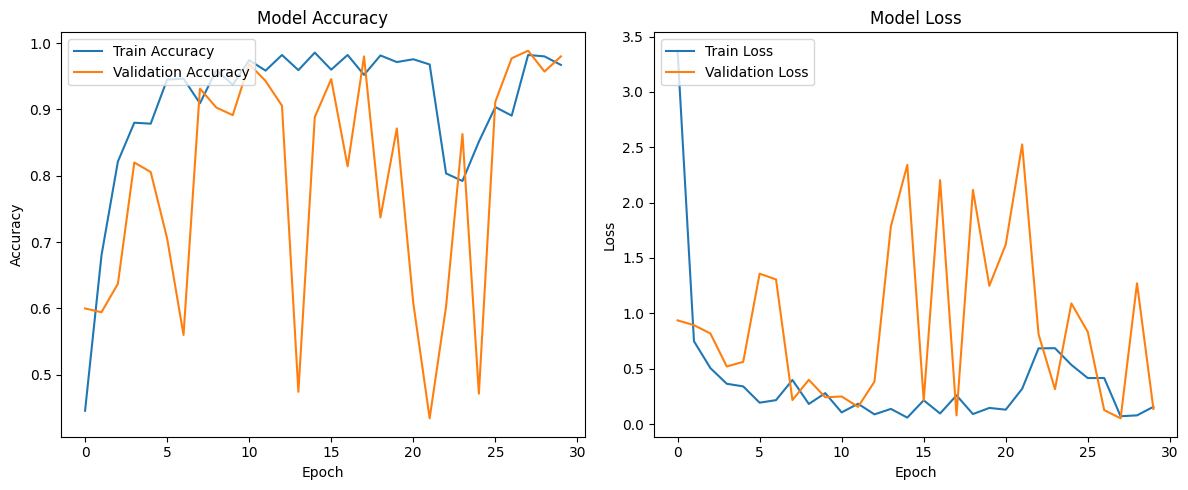

In [63]:
# Plot training & validation accuracy values
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

In [64]:
test_loss, test_acc = vgg16_model.evaluate_model(test_images_vgg, test_labels_cat)
print(f'Test accuracy: {test_acc:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.2782 - loss: 1.1034
Test accuracy: 0.3105


In [65]:
# Melakukan prediksi
predictions = vgg16_model.model.predict(test_images_vgg)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(test_labels_cat, axis=1), predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step
Confusion Matrix:
 [[  0   0 151]
 [  0   0 151]
 [  0   0 136]]


In [66]:
# Classification Report (Precision, Recall, F1 Score)
class_report = classification_report(test_labels, predicted_classes)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.00      0.00      0.00       151
           2       0.31      1.00      0.47       136

    accuracy                           0.31       438
   macro avg       0.10      0.33      0.16       438
weighted avg       0.10      0.31      0.15       438



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
# Misclassification Rate
miss_class_rate = 1 - test_acc
print(f'Misclassification Rate: {miss_class_rate:.4f}')

Misclassification Rate: 0.6895


ROC AUC Score: 0.5000


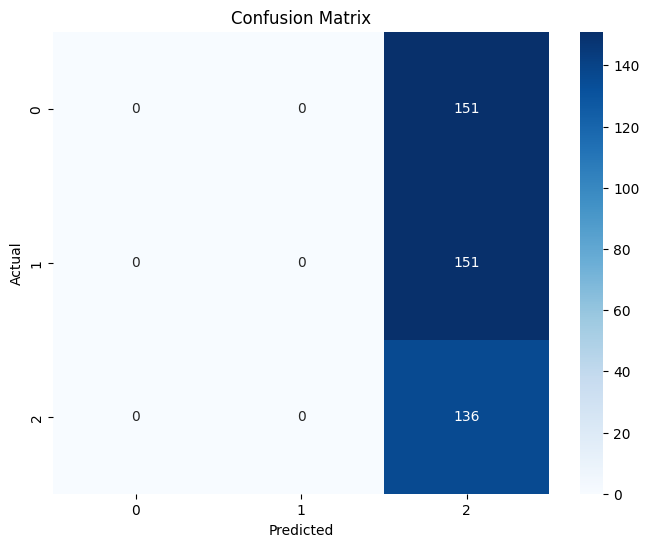

In [68]:
# ROC AUC for each class
auc_roc = roc_auc_score(test_labels_cat, predictions, multi_class="ovr")
print(f'ROC AUC Score: {auc_roc:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

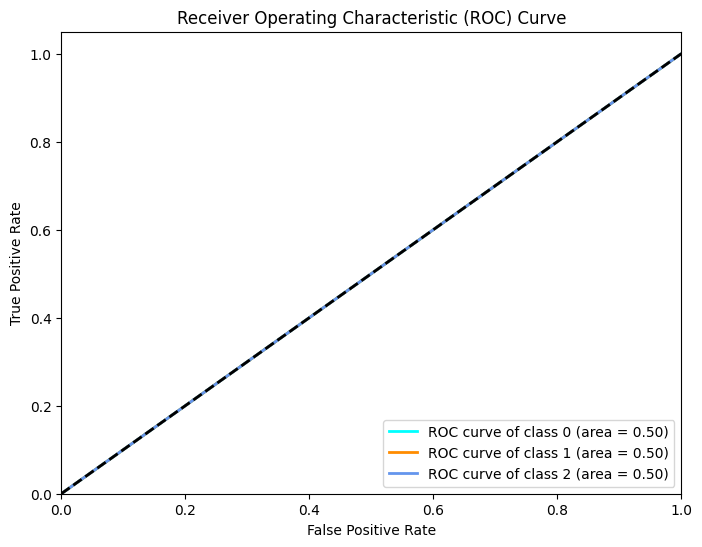

In [73]:
# AUC-ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'pink', 'gray', 'blue']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()